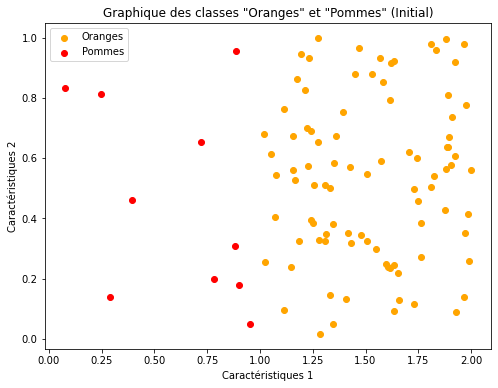

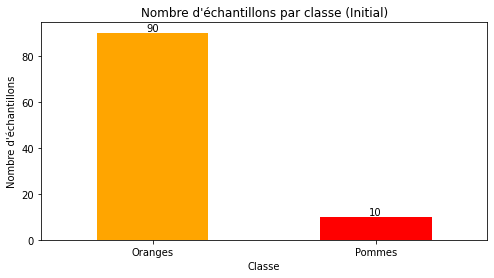

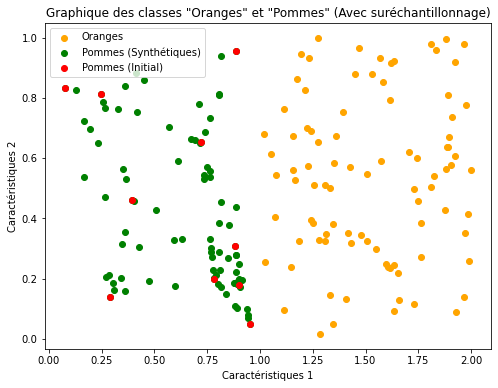

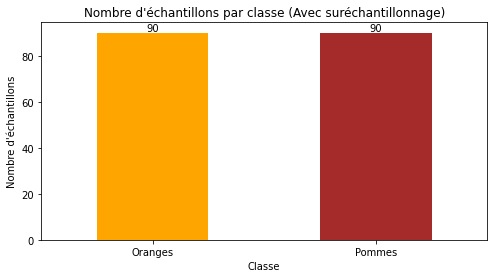

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Création des données initiales pour la classe "Oranges" (90 lignes) et "Pommes" (10 lignes)
oranges_data = {
    'Colonne1': np.random.uniform(1, 2, 90),
    'Colonne2': np.random.rand(90),
    'Classe': 'Oranges'
}

pommes_data = {
    'Colonne1': np.random.rand(10),
    'Colonne2': np.random.rand(10),
    'Classe': 'Pommes'
}

df_oranges = pd.DataFrame(oranges_data)
df_pommes = pd.DataFrame(pommes_data)

# Concaténation des dataframes
df = pd.concat([df_oranges, df_pommes], ignore_index=True)

# Création du graphique initial
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Classe'] == 'Oranges']['Colonne1'], df[df['Classe'] == 'Oranges']['Colonne2'], label='Oranges', color='orange')
plt.scatter(df[df['Classe'] == 'Pommes']['Colonne1'], df[df['Classe'] == 'Pommes']['Colonne2'], label='Pommes', color='red')
plt.xlabel('Caractéristiques 1')
plt.ylabel('Caractéristiques 2')
plt.title('Graphique des classes "Oranges" et "Pommes" (Initial)')
plt.legend()

# Ajout de diagrammes en barres avec les quantités sur chaque barre

plt.figure(figsize=(8, 4))
class_counts_initial = df['Classe'].value_counts()
ax = class_counts_initial.plot(kind='bar', color=['orange', 'red'])
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')
plt.title('Nombre d\'échantillons par classe (Initial)')
plt.xticks(rotation=0)

# Ajouter des étiquettes aux barres dans le premier graphique
for i, v in enumerate(class_counts_initial):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Séparation des données en X (caractéristiques) et y (étiquettes)
X = df[['Colonne1', 'Colonne2']]
y = df['Classe']

# Application de SMOTE pour suréchantillonner la classe "Pommes"
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Création d'un dataframe avec les nouvelles données synthétiques
df_resampled = pd.DataFrame(data=X_resampled, columns=['Colonne1', 'Colonne2'])
df_resampled['Classe'] = y_resampled

# Création du graphique avec les points initiaux en orange, la classe "Pommes" initiale en rouge et la classe "Pommes" synthétique en vert
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Classe'] == 'Oranges']['Colonne1'], df[df['Classe'] == 'Oranges']['Colonne2'], label='Oranges', color='orange')
plt.scatter(df_resampled[df_resampled['Classe'] == 'Pommes']['Colonne1'], df_resampled[df_resampled['Classe'] == 'Pommes']['Colonne2'],
            label='Pommes (Synthétiques)', color='green')
plt.scatter(df[df['Classe'] == 'Pommes']['Colonne1'], df[df['Classe'] == 'Pommes']['Colonne2'], label='Pommes (Initial)', color='red')

plt.xlabel('Caractéristiques 1')
plt.ylabel('Caractéristiques 2')
plt.title('Graphique des classes "Oranges" et "Pommes" (Avec suréchantillonnage)')
plt.legend()

# Ajout de diagrammes en barres
plt.figure(figsize=(8, 4))
class_counts_resampled = df_resampled['Classe'].value_counts()
ax = class_counts_resampled.plot(kind='bar', color=['orange', 'brown', 'green'])
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')
plt.title('Nombre d\'échantillons par classe (Avec suréchantillonnage)')
plt.xticks(rotation=0)

# Ajouter des étiquettes aux barres dans le deuxième graphique
for i, v in enumerate(class_counts_resampled):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()
